In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [32]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


2016-08-23


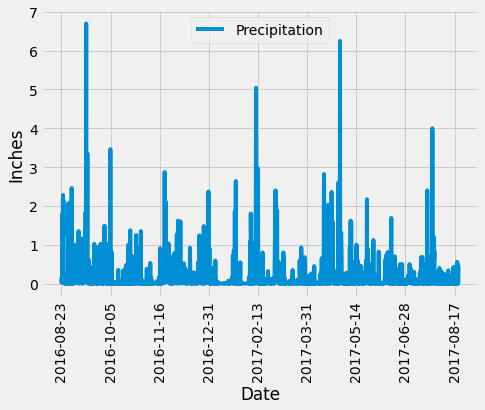

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print (year_ago)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
year_prcp = session.query(*sel).filter(Measurement.date>=year_ago,Measurement.prcp!= None).\
order_by(Measurement.date).all()
# print(year_prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
yearDF=pd.DataFrame(year_prcp,columns=['Date', 'Precipitation'])
yearDF=yearDF.set_index('Date')
yearDF.head()
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
yearDF.plot(figsize=(7,5))
plt.tight_layout()
plt.ylabel('Inches')
plt.xticks(rotation="vertical")
plt.savefig('Precipitation.png')




In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearDF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column['name'], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [48]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations= session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
most_active

[(54.0, 85.0, 71.66378066378067)]

In [63]:
# Query the last 12 months of temperature observation data for this station 
year_temp=session.query(Measurement.tobs).filter(Measurement.date>=year_ago,Measurement.station=='USC00519281').\
order_by(Measurement.tobs).all()
year_temp

#Dataframe for yearly temp
yeartempDF=pd.DataFrame(year_temp,columns=['Tobs'])
yeartempDF.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


Text(0.5, 0, 'Temperature')

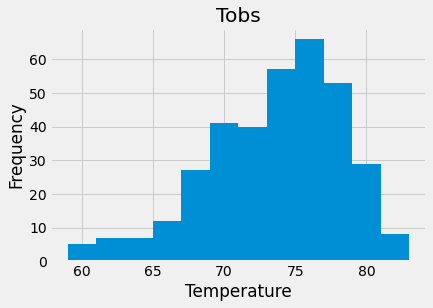

In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

yeartempDF.hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')



# Close Session

In [69]:
session.close()